In [56]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from ass1_methods import *

#### e)

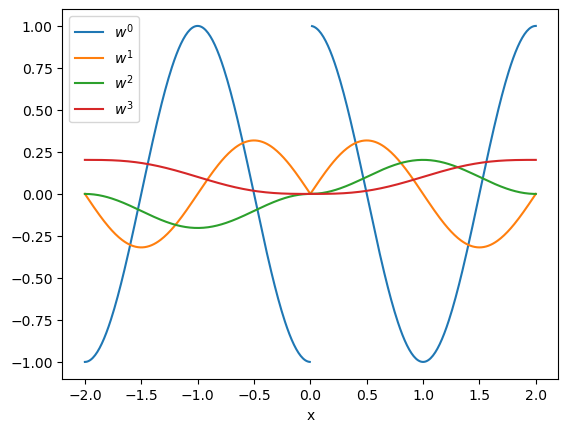

In [57]:
N = 400
XX = np.linspace(-2,2,N)

w0 = np.cos(np.pi*XX)
w0[:int(N/2)] *= -1
w0[int(N/2)] = np.nan

w1 = np.sin(np.pi*XX)/np.pi
w1[:int(N/2)] *= -1

w2 = -np.cos(np.pi*XX)/np.pi**2 + 1/np.pi**2
w2[:int(N/2)] *= -1

w3 = -np.sin(np.pi*XX)/np.pi**3+XX/np.pi**2
w3[:int(N/2)] *= -1

plt.plot(XX,w0,label="$w^0$")
plt.plot(XX,w1,label="$w^1$")
plt.plot(XX,w2,label="$w^2$")
plt.plot(XX,w3,label="$w^3$")
plt.xlabel('x')
plt.legend()
plt.show()


In [58]:
def w0(x):
    if x < 0:
        return -np.cos(np.pi *x)
    else:
        return np.cos(np.pi*x)
w0 = np.vectorize(w0)

def w1(x):
    if x < 0:
        return -1/np.pi*np.sin(np.pi *x)
    else:
        return 1/np.pi*np.sin(np.pi*x)

w1 = np.vectorize(w1)
    
def w2(x):
    if x < 0:
        return 1/np.pi**2*np.cos(np.pi *x)-1/np.pi**2
    else:
        return -1/np.pi**2*np.cos(np.pi *x)+1/np.pi**2

w2 = np.vectorize(w2)

def w3(x):
    if x < 0:
        return 1/np.pi**3*np.sin(np.pi *x)-x/np.pi**2
    else:
        return -1/np.pi**3*np.sin(np.pi *x)+x/np.pi**2

w3 = np.vectorize(w3)

In [59]:
Ns = [4,8,14,20,30,40,50,60,80,110]
#Ns = [50]
errors = np.empty((3,len(Ns)))

for i in range(len(Ns)):
    XX = np.arange(Ns[i])*4/Ns[i]-2
    XXsc = np.arange(Ns[i])*2*np.pi/Ns[i]
    ww3 = w3(XX)

    DN = Dmatrix(Ns[i],XXsc)

    ww2 = DN*np.pi/2@ww3
    ww1 = DN*np.pi/2@ww2
    ww0 = DN*np.pi/2@ww1

    errors[0][i] = np.linalg.norm( 2*(ww0 - w0(XX))/np.sqrt(Ns[i]) )
    errors[1][i] = np.linalg.norm( 2*(ww1 - w1(XX))/np.sqrt(Ns[i]) )
    errors[2][i] = np.linalg.norm( 2*(ww2 - w2(XX))/np.sqrt(Ns[i]) )

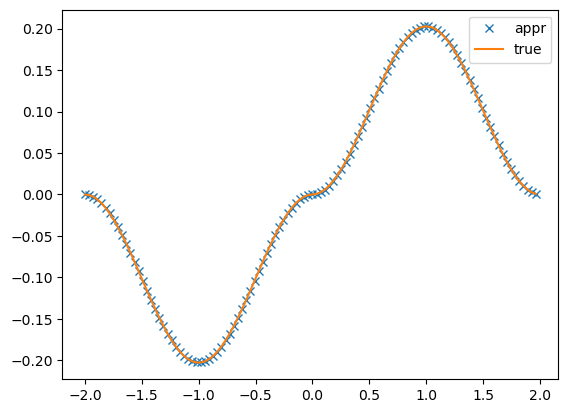

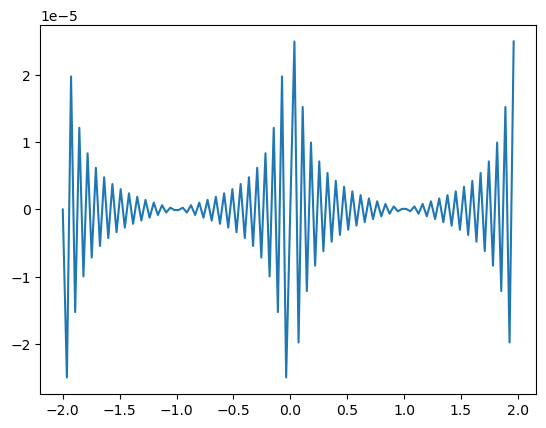

In [60]:
plt.plot(XX,ww2,'x',label='appr')
plt.plot(XX,w2(XX),label='true')
plt.legend()
plt.show()

plt.plot(XX,w2(XX)-ww2)
plt.show()


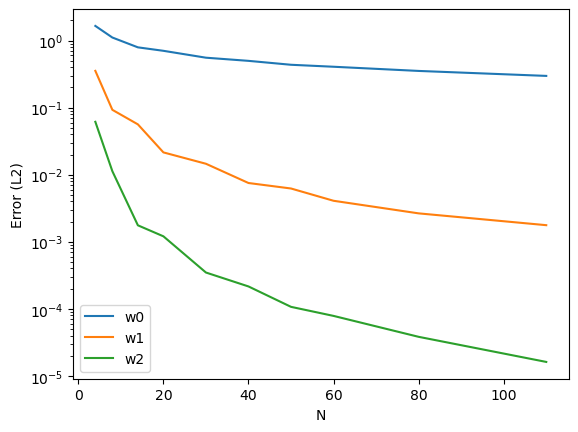

In [61]:
for i in range(3):
    plt.semilogy(Ns,errors[i],label=f'w{i}')

plt.xlabel("N")
plt.ylabel("Error (L2)")
plt.legend()
plt.show()

#### f)
for time comparison, see timing.ipynb

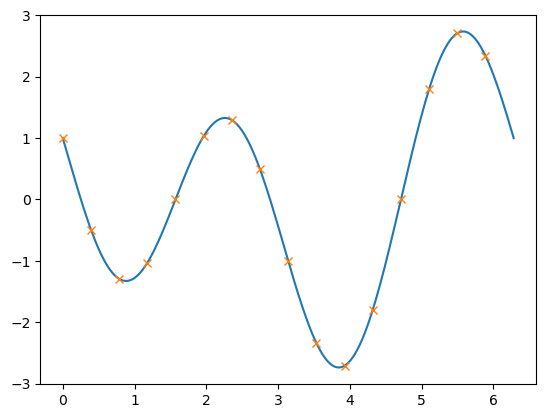

In [62]:
def vfun(x):
    return np.exp(np.sin(np.pi*x))
vfun = np.vectorize(vfun)

def dv(x):
    return np.pi*np.cos(np.pi*x)*vfun(x)
dv = np.vectorize(dv)

def testfun(x):
    return np.sin(x)+np.cos(2*x)
testfun = np.vectorize(testfun)

def dtfun(x):
    return np.cos(x)-2*np.sin(2*x)
dtfun = np.vectorize(dtfun)

def fft_derivative(N, fun, L = 2*np.pi):
    
    h = L/N
    X = np.arange(N)*h
    f = fun(X)

    k = sp.fft.fftfreq(N,1/N) * 1j

    return np.real(sp.fft.ifft( k * sp.fft.fft(f) ))*2*np.pi/L

XX = np.linspace(0,2*np.pi,200)
true_deriv = dtfun(XX)

N = 16
appr_deriv = fft_derivative(N=N,fun=testfun)

plt.plot(XX,true_deriv)
plt.plot(np.arange(N)*2*np.pi/N,appr_deriv,'x')



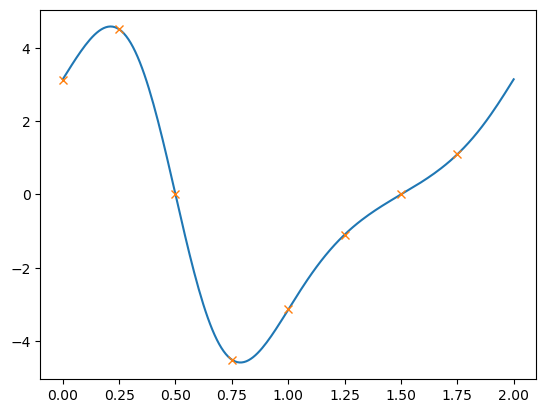

In [63]:
XX = np.linspace(0,2,200)
true_deriv = dv(XX)

N = 8
appr_deriv = fft_derivative(N,vfun,2)

plt.plot(XX,true_deriv)
plt.plot(np.arange(N)*2/N,appr_deriv,'x')

#### h)

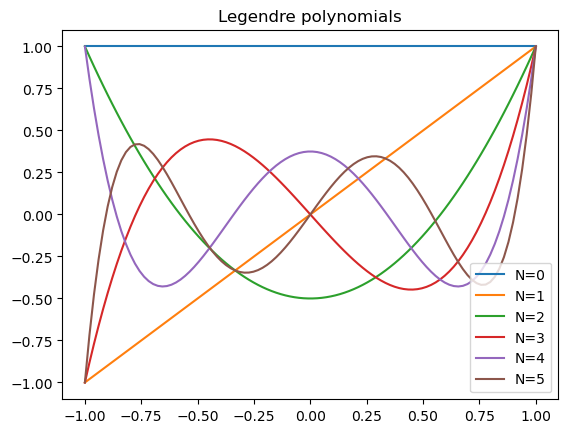

In [64]:
XX = np.linspace(-1,1,100)
alpha = 0
beta = 0

for n in range(6):
    plt.plot(XX,JacobiP(XX,alpha,beta,n),label=f'N={n}')
plt.title("Legendre polynomials")
plt.legend()
plt.show()

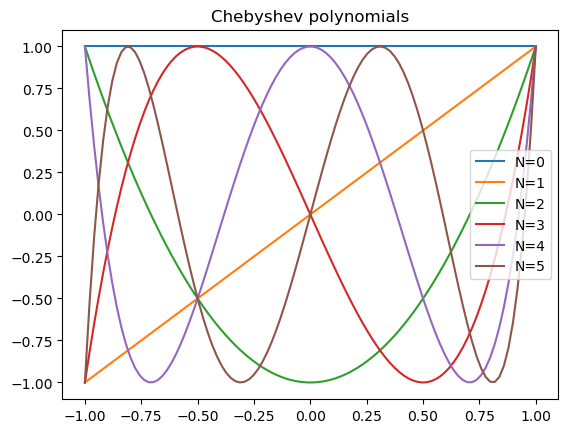

In [65]:
XX = np.linspace(-1,1,100)
alpha = -1/2
beta = -1/2

for n in range(6):
    Pvals = JacobiP(XX,alpha,beta,n)
    cheb = sp.special.gamma(n+1)*sp.special.gamma(1/2)/sp.special.gamma(n+1/2)*Pvals
    #cheb = Pvals
    plt.plot(XX,cheb,label=f"N={n}")
plt.legend()
plt.title("Chebyshev polynomials")
plt.show()

#### QUESTION i)

Error for u(x)=1: with N = 2
8.881784197001252e-16
1.189200623826982


Text(0, 0.5, 'Absolute error')

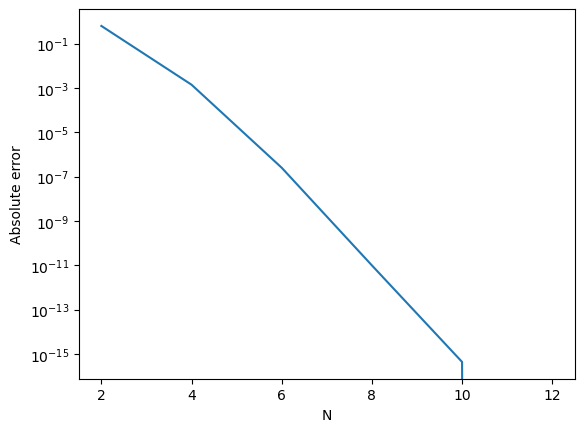

In [66]:
true_norm1 = 2
N = 2
xx = JacobiGL(alpha=0, beta=0, N=N-1)
P = JacobiP(xx,alpha=0,beta=0,n=N-1,matrix=True)
P = P.T
for i in range(P.shape[0]):
    P[:,i] = P[:,i] / np.sqrt(2/(2*i+1))

M = np.linalg.inv(P@P.T)
u1 = np.ones(len(xx))
L2_squared = u1.T@M@u1
print("Error for u(x)=1: with N = 2")
print(abs(L2_squared-true_norm1))


true_norm2 = 1-np.sin(2)*np.cos(2)/2
print(true_norm2)

Ns = [2,4,6,8,10,12]
#Ns = [6]
errors2 = []
for N in Ns:
    xx = JacobiGL(alpha=0, beta=0, N=N-1)
    P = JacobiP(xx,alpha=0,beta=0,n=N-1,matrix=True)
    P = P.T
    for i in range(P.shape[0]):
        P[:,i] = P[:,i] / np.sqrt(2/(2*i+1))

    M = np.linalg.inv(P@P.T)
    u2 = np.sin(xx+1)
    L2_squared_2 = u2.T@M@u2

    errors2.append(abs(L2_squared_2-true_norm2))

#plt.show()
plt.semilogy(Ns,errors2,label="u2")
plt.xlabel("N")
plt.ylabel("Absolute error")
#plt.legend()


#### Q j)

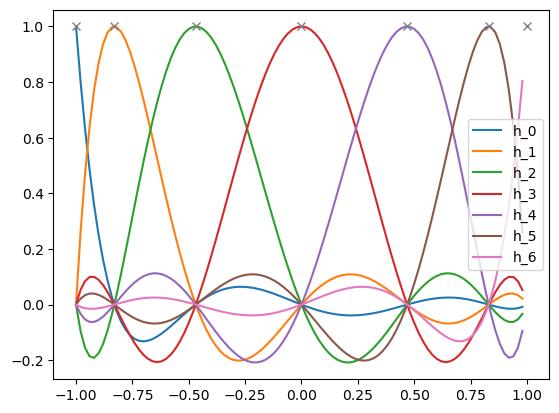

In [67]:
X = JacobiGL(0,0,6)
V = JacobiP(X,0,0,6,matrix=True).T
Vinv = np.linalg.inv(V)

XX = np.arange(100)*2/100-1
Phi = JacobiP(XX,0,0,6,matrix=True)

H = Vinv.T @ Phi 

for i in range(7):
    plt.plot(XX,H[i],label=f'h_{i}')
plt.plot(X,np.ones_like(X),'x')
plt.legend()
plt.show()

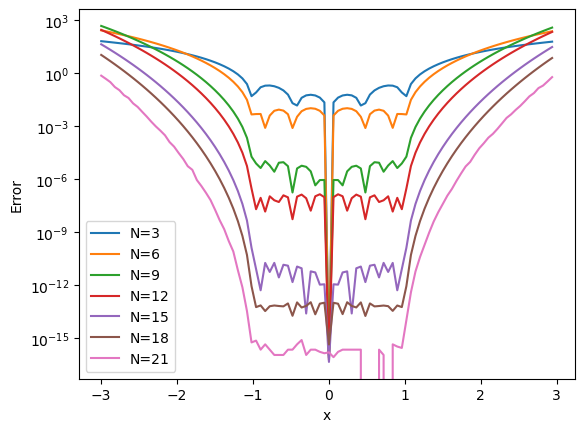

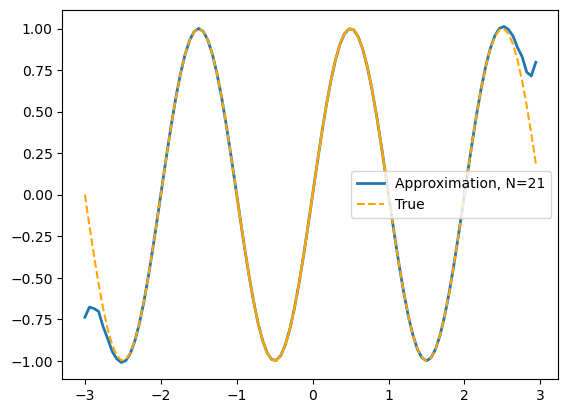

In [68]:
def fun(x):
    return np.sin(np.pi*x)
fun = np.vectorize(fun)

Ns = np.arange(1,8)*3
#XX = np.arange(100)*2/100-1
XX = np.arange(100)*6/100-3
fXX = fun(XX)

for n in range(len(Ns)):
    X = JacobiGL(0,0,Ns[n])
    V = JacobiP(X,0,0,Ns[n],matrix=True)
    Vinv = np.linalg.inv(V)

    fval = fun(X)

    Phi = JacobiP(XX,0,0,Ns[n],matrix=True)
    H = Vinv @ Phi 

    appr = fval @ H
    plt.semilogy(XX,np.abs(appr-fXX),label=f'N={Ns[n]}')
plt.legend()
plt.ylabel('Error')
plt.xlabel('x')

plt.show()

plt.plot(XX,appr,label=f"Approximation, N={Ns[-1]}",lw=2)
plt.plot(XX,fun(XX),"--",label="True",color="orange")
plt.plot(np.arange(50)*2/50-1,fun(np.arange(50)*2/50-1),color="orange")
plt.legend()



    

#### k)

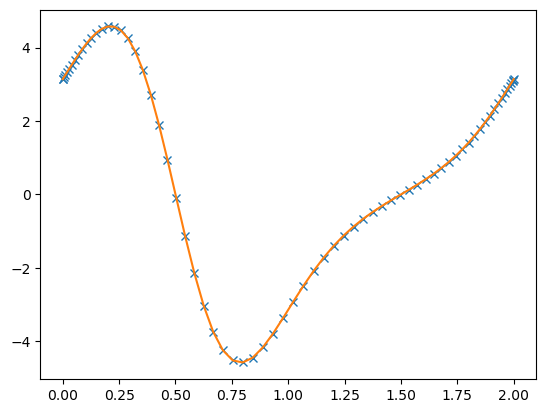

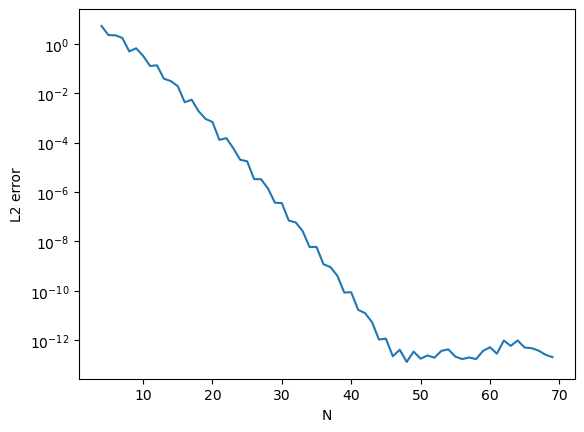

In [69]:
def vfun(x):
    return np.exp(np.sin(np.pi*x))
    #return x
vfun = np.vectorize(vfun)
def vdiff(x):
    return np.pi*np.cos(np.pi*x)*np.exp(np.sin(np.pi*x))
    #return float(1)
vdiff = np.vectorize(vdiff)

N = np.arange(4,70)
norms = []
for i in range(len(N)):
    xGL = JacobiGL(0,0,N[i])
    dV = GradJacobiP(xGL,0,0,N[i],matrix=True)
    V = JacobiP(xGL,0,0,N[i],matrix=True).T
    Vi = np.linalg.inv(V)
    D = dV@Vi
    v = vfun(xGL+1)
    dv = D@v

    nvec = np.sqrt(2/(2*np.arange(N[i]+1)+1))
    V = (V.T / nvec).T
    M = np.linalg.inv(V@V.T)
    err = dv-vdiff(xGL+1)
    norms.append(np.sqrt(err@M@err))
    
plt.plot(xGL+1,dv,'x')
plt.plot(xGL+1,vdiff(xGL+1))
plt.show()

plt.semilogy(N,norms)
plt.xlabel("N")
plt.ylabel("L2 error")
plt.show()